In [11]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Reading the dataset
dataset = pd.read_csv("/content/advertising.csv")

In [21]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<ipython-input-25-e26ae89dfd77>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sales']);


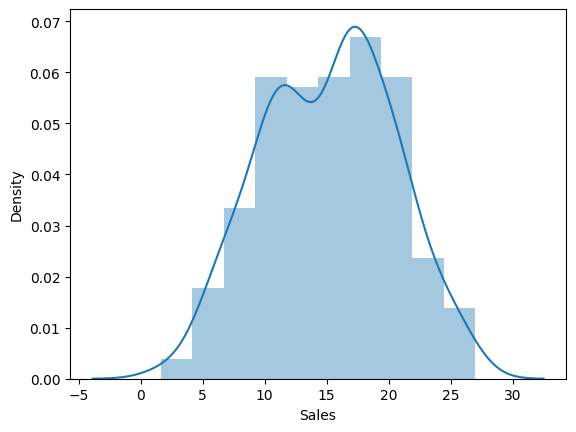

In [25]:
sns.distplot(dataset['Sales']);

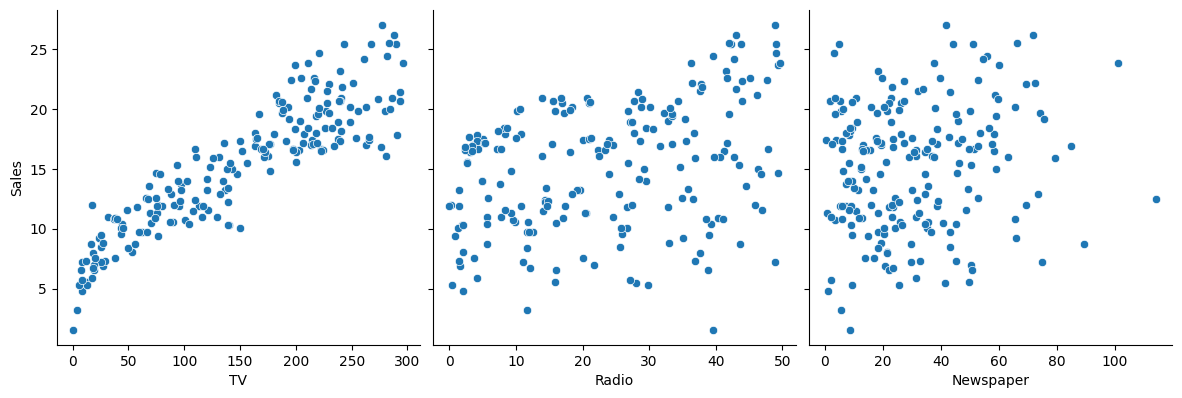

In [24]:
sns.pairplot(dataset, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
#Setting the value for X and Y
x = dataset[['TV']]
y = dataset['Sales']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [30]:
slr= LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [31]:
#Printing the model coefficients
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  6.948683200001357
Coefficient: [0.05454575]


In [32]:
print('Regression Equation: Sales = 6.948 + 0.054 * TV')

Regression Equation: Sales = 6.948 + 0.054 * TV


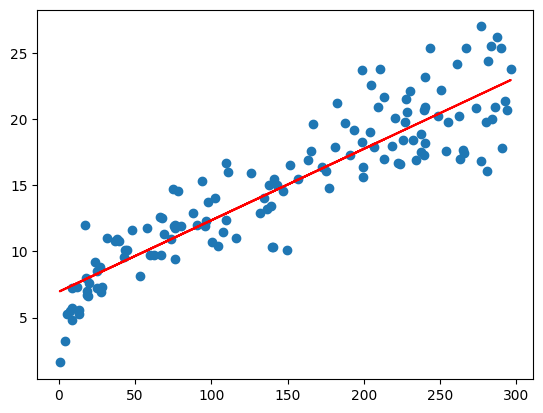

In [33]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [34]:
#Prediction of Test and Training set result
y_pred_slr= slr.predict(x_test)
x_pred_slr= slr.predict(x_train)

In [ ]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


In [35]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [37]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [39]:
mlr= LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [40]:
#Printing the model coefficients
print(mlr.intercept_)
# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

4.334595861728431


[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558054),
 ('Newspaper', 0.0062899501461303325)]

In [42]:
#Predicting the Test and Train set result
y_pred_mlr= mlr.predict(x_test)
x_pred_mlr= mlr.predict(x_train)

In [43]:
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [44]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
126,6.6,9.352211
104,20.7,20.963446
99,17.2,16.488511
92,19.4,20.109710
111,21.8,21.671484
167,17.2,16.160544
116,12.2,13.561806
96,16.7,15.393381
52,22.6,20.819808
69,22.3,21.005371


In [45]:
#Predict for any value
mlr.predict([[56, 55, 67]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.82112602])

In [46]:
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))

R squared value of the model: 90.11


In [47]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.227818356658941
Mean Square Error: 2.6360765623280655
Root Mean Square Error: 1.623599877533891
